# Q1. What is Elastic Net Regression and how does it differ from other regression techniques?

# ANS:- Elastic Net regression is combination of Lasso regression and ridge regression in whcih both has has their own advantages , talking about ridge , it helps in reducing overfitting like the feature that is not important then their coffecients becomes small to decrease the impact of that feature on target variable while lasso regression helps in feature selection , let's say there are two features which are equally impacting target variable then in that case , the coffecients of one of the feature becomes to reduce number of features

Mean Squared Error: 626.4532554697237


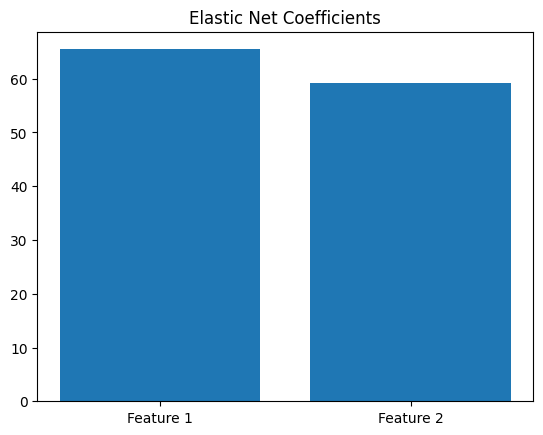

In [1]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an Elastic Net regression model
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)

# Fit the model to the training data
elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elastic_net.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the coefficients of the model
plt.bar(range(len(elastic_net.coef_)), elastic_net.coef_)
plt.xticks(range(len(elastic_net.coef_)), ['Feature 1', 'Feature 2'])
plt.title('Elastic Net Coefficients')
plt.show()


# Q2. How do you choose the optimal values of the regularization parameters for Elastic Net Regression?

# ANS:-
# Choosing the optimal values for the regularization parameters (α and λ) in Elastic Net Regression involves a process called hyperparameter tuning. Here are some common methods for selecting optimal values:

In [2]:
#Grid Search:

from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 0.5, 1.0],
              'l1_ratio': [0.1, 0.5, 0.9]}

elastic_net = ElasticNet()
grid_search = GridSearchCV(elastic_net, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']


In [3]:
# Randomized Search:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'alpha': [0.1, 0.5, 1.0],
              'l1_ratio': [0.1, 0.5, 0.9]}

elastic_net = ElasticNet()
randomized_search = RandomizedSearchCV(elastic_net, param_dist, n_iter=10, cv=5)
randomized_search.fit(X_train, y_train)

best_alpha = randomized_search.best_params_['alpha']
best_l1_ratio = randomized_search.best_params_['l1_ratio']


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


# Q3. What are the advantages and disadvantages of Elastic Net Regression?

# ANS:-

Advantages of Elastic Net Regression:

Variable Selection: Combines Lasso and Ridge regression, providing a balance between feature selection and regularization.
Handles Multicollinearity: Effective in situations with highly correlated predictors by shrinking and selecting groups of correlated variables.
Flexibility in Hyperparameter Tuning: Allows fine-tuning through hyperparameters (α and λ) to control the amount and type of regularization.

# __****__
Disadvantages of Elastic Net Regression:

Complexity: The inclusion of two hyperparameters adds complexity to the model tuning process.
Interpretability: The regularization may make it challenging to interpret the coefficients of the model compared to standard linear regression.
Sensitive to Outliers: Like other linear regression models, Elastic Net can be sensitive to outliers in the data

# Q4. What are some common use cases for Elastic Net Regression?

# ANS:-
# __**__

Elastic Net Regression is particularly useful in several common use cases:

# High-Dimensional Data:

Dealing with datasets where the number of features is much larger than the number of observations.
When traditional linear regression models may overfit or perform poorly in such scenarios, Elastic Net helps by incorporating regularization.

# Multicollinearity:

Addressing multicollinearity, where predictor variables are highly correlated with each other.
Elastic Net can handle correlated features and perform automatic variable selection, mitigating the issues associated with multicollinearity.


# Feature Selection:

Selecting relevant features from a large pool of potential predictors.
Lasso regularization in Elastic Net encourages sparsity, leading to automatic feature selection by setting some coefficients to zero.


# Regularization in Regression:

Applying a regularization technique to prevent overfitting in linear regression models.
Combining both L1 and L2 regularization, Elastic Net provides a flexible approach to balance between feature selection and regularization.


# Biomedical Research:

Analyzing gene expression data where the number of genes may significantly exceed the number of samples.
Identifying important genes and reducing the risk of overfitting in predictive models.



# Finance and Economics:

Predicting financial outcomes or economic indicators where there are many potential predictors.
Handling collinearity among economic factors and improving model generalization.


# Signal Processing:

Processing signals or images with a large number of features.
Managing noise and selecting relevant features in signal processing applications.
Elastic Net Regression's ability to handle high-dimensional data, multicollinearity, and provide a balance between Lasso and Ridge regularization makes it a versatile choice in various fields where linear regression is applicable

# Q5. How do you interpret the coefficients in Elastic Net Regression?

# ANS:-

# Interpreting coefficients in Elastic Net Regression can be more complex than in simple linear regression due to the combination of L1 (Lasso) and L2 (Ridge) regularization. Here are some key points to consider when interpreting the coefficients:



# Magnitude and Sign:

The magnitude of a coefficient represents the strength of the relationship between the corresponding predictor variable and the target variable.
The sign indicates the direction of the relationship (positive or negative).


#L1 Regularization (Lasso):

L1 regularization encourages sparsity by setting some coefficients to exactly zero.
Coefficients that are not zero indicate the selected features in the model.



# L2 Regularization (Ridge):

L2 regularization tends to shrink the coefficients toward zero without setting them exactly to zero.
All features contribute to the model, but some may have smaller magnitudes.



# Overall Impact of Regularization (Elastic Net):

Elastic Net combines both L1 and L2 regularization with the hyperparameter α (alpha).
A higher α emphasizes L1 regularization, and a lower α emphasizes L2 regularization.
The value of α influences the degree of sparsity in the model.



#  Interaction between Features:

Coefficients should be interpreted in the context of the entire model, considering the interplay between features.
Due to the combination of regularization techniques, the coefficients may be influenced by the presence of correlated features.


# Scaling of Features:

It's essential to scale the features before applying Elastic Net Regression to ensure fair comparison and meaningful interpretation of coefficients.


# Regularization Strength (λ):

The overall strength of regularization is controlled by the hyperparameter λ (lambda).
Higher values of λ lead to stronger regularization, potentially shrinking coefficients more aggressively.

# Q6. How do you handle missing values when using Elastic Net Regression?

In [ ]:
#

# ANS:-

Handling missing values is an important preprocessing step when using Elastic Net Regression or any other machine learning model. Here are several approaches to deal with missing values:

Imputation:

Fill in missing values with a suitable imputation method.
Common imputation techniques include mean, median, or mode imputation for numerical variables and mode imputation for categorical variables.
Scikit-learn provides the SimpleImputer class that can be used for imputation.

In [4]:
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [5]:
X_train_imputed

array([[-1.15099358,  0.37569802],
       [ 0.25755039, -0.07444592],
       [ 0.00511346, -0.23458713],
       [-0.24538812, -0.75373616],
       [-0.78325329, -0.32206152],
       [-0.84679372, -1.51484722],
       [ 0.24196227, -1.91328024],
       [ 0.29612028,  0.26105527],
       [ 1.14282281,  0.75193303],
       [ 1.03099952,  0.93128012],
       [ 0.62566735, -0.85715756],
       [ 0.82254491, -1.22084365],
       [ 0.33126343,  0.97554513],
       [-0.11564828, -0.3011037 ],
       [-0.88385744,  0.15372511],
       [-0.88951443, -0.81581028],
       [-1.60748323,  0.18463386],
       [-0.16128571,  0.40405086],
       [ 1.8861859 ,  0.17457781],
       [ 0.91540212,  0.32875111],
       [-0.8084936 , -0.50175704],
       [-1.41537074, -0.42064532],
       [-0.44651495,  0.85639879],
       [ 0.36139561,  1.53803657],
       [-1.32818605,  0.19686124],
       [-0.07201012,  1.0035329 ],
       [-0.03471177, -1.16867804],
       [-0.21967189,  0.35711257],
       [ 0.06023021,

# Q9. What is the purpose of pickling a model in machine learning?

# ANS:-
Pickling a model in machine learning refers to the process of serializing (converting an object into a byte stream) and saving a trained machine learning model to a file. This is done using the Python pickle module or other serialization libraries like joblib. The primary purposes of pickling a model are:

Model Persistence:

Storing a trained model allows you to reuse it later without having to retrain the model every time you want to make predictions.
This is particularly useful when working with large datasets or complex models that take a significant amount of time to train.
Deployment:

Pickling enables the easy deployment of machine learning models in production environments.
Once a model is trained and pickled, it can be loaded and used for making predictions without the need for the original training environment.
Reproducibility:

Pickling ensures that you can reproduce the same model and predictions at a later time.
This is crucial for maintaining consistency and reproducibility in research, development, and production scenarios.
Scalability:

In distributed computing or cloud environments, pickling allows you to train a model on one machine and use it on multiple machines without the need for retraining.
This is especially important in scenarios where models need to be deployed across different servers or computing nodes.
Sharing Models:

Pickled models can be easily shared with others, allowing collaboration and the sharing of pre-trained models.
This is beneficial in situations where multiple individuals or teams are working on the same project, and model sharing simplifies collaboration